<a href="https://colab.research.google.com/github/NizarZebua/Credit-Risk-Prediction-Model/blob/main/Final_Task_ID_X_Partners_Data_Scientist_Muhammad_Nizar_Alharith_Zebua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Understanding

In [2]:
df = pd.read_csv('/content/drive/MyDrive/07 Colab Notebooks/PROJECT/01 PBI RAKAMIN /loan_data_2007_2014.csv')
df.head()

<ipython-input-2-5a52c90e7088>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/07 Colab Notebooks/PROJECT/01 PBI RAKAMIN /loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(466285, 75)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
df_with_na = df.isnull().sum()/len(df)
df_with_na = df_with_na[df_with_na > 0]
print("Jumlah Kolom dengan Missing Values: ", len(df_with_na))
print(df_with_na)

Jumlah Kolom dengan Missing Values:  40
emp_title                      0.059166
emp_length                     0.045054
annual_inc                     0.000009
desc                           0.729820
title                          0.000045
delinq_2yrs                    0.000062
earliest_cr_line               0.000062
inq_last_6mths                 0.000062
mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
open_acc                       0.000062
pub_rec                        0.000062
revol_util                     0.000729
total_acc                      0.000062
last_pymnt_d                   0.000806
next_pymnt_d                   0.487286
last_credit_pull_d             0.000090
collections_12_mths_ex_med     0.000311
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
acc_now_delinq                 0.000062
tot_coll_amt                   0.150715


In [8]:
df.duplicated().sum()

np.int64(0)

# Feature Engineering

In [9]:
print(df['loan_status'].value_counts())

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


In [10]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Late (31-120 days)',
            'Does not meet the credit policy. Status:Fully Paid',
            'Late (16-30 days)', 'Default','Does not meet the credit policy. Status:Charged Off',
]), 1,0)

In [11]:
df['good_bad'].value_counts()

,count
good_bad,
0,412111
1,54174


In [12]:
df[['loan_status','good_bad']]

,loan_status,good_bad
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0
...,...,...
466280,Current,0
466281,Charged Off,1
466282,Current,0
466283,Fully Paid,0


In [13]:
df_with_na.sort_values(ascending=False, inplace=True)
df_with_na = df_with_na[df_with_na > 0.50]
print(f"Jumlah kolom dengan missing values lebih dari 50%:", len(df_with_na))
print(df_with_na)

Jumlah kolom dengan missing values lebih dari 50%: 21
inq_fi                         1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_last_12m                   1.000000
annual_inc_joint               1.000000
verification_status_joint      1.000000
dti_joint                      1.000000
total_cu_tl                    1.000000
il_util                        1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
open_il_24m                    1.000000
open_il_12m                    1.000000
open_il_6m                     1.000000
open_acc_6m                    1.000000
open_rv_12m                    1.000000
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
desc                           0.729820
mths_since_last_delinq         0.536906
dtype: float64


In [14]:
# Menghapus kolom yang memiliki missing values lebih dari 50%
df = df.drop(columns=df_with_na.index)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

In [16]:
# Menghapus kolom-kolom yang tidak relevan atau tidak dibutuhkan
drop_cols = ['Unnamed: 0', 'id', 'member_id','url','zip_code',
             'addr_state', 'policy_code', 'title','out_prncp_inv',
             'total_pymnt_inv', 'funded_amnt_inv','total_pymnt_inv',
             'out_prncp_inv', 'loan_status']
df.drop(columns=drop_cols, inplace=True)

In [17]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'good_bad'],
      dtype='object')

In [18]:
# Mengubah tipe data menjadi datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   466285 non-null  int64         
 1   funded_amnt                 466285 non-null  int64         
 2   term                        466285 non-null  object        
 3   int_rate                    466285 non-null  float64       
 4   installment                 466285 non-null  float64       
 5   grade                       466285 non-null  object        
 6   sub_grade                   466285 non-null  object        
 7   emp_title                   438697 non-null  object        
 8   emp_length                  445277 non-null  object        
 9   home_ownership              466285 non-null  object        
 10  annual_inc                  466281 non-null  float64       
 11  verification_status         466285 non-

In [20]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
df['term'] = df['term'].str.replace(' months', '').astype(int)
df['term'].unique()

array([36, 60])

In [22]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [23]:
df['emp_length'] = df['emp_length'].str.replace('+ years','')
df['emp_length'] = df['emp_length'].str.replace('years','')
df['emp_length'] = df['emp_length'].str.replace('< 1 year','0')
df['emp_length'] = df['emp_length'].str.replace('year','')
df['emp_length'].fillna(-1, inplace = True)
df['emp_length'] = df['emp_length'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   466285 non-null  int64         
 1   funded_amnt                 466285 non-null  int64         
 2   term                        466285 non-null  int64         
 3   int_rate                    466285 non-null  float64       
 4   installment                 466285 non-null  float64       
 5   grade                       466285 non-null  object        
 6   sub_grade                   466285 non-null  object        
 7   emp_title                   438697 non-null  object        
 8   emp_length                  466285 non-null  int64         
 9   home_ownership              466285 non-null  object        
 10  annual_inc                  466281 non-null  float64       
 11  verification_status         466285 non-

# EDA

## Heatmap

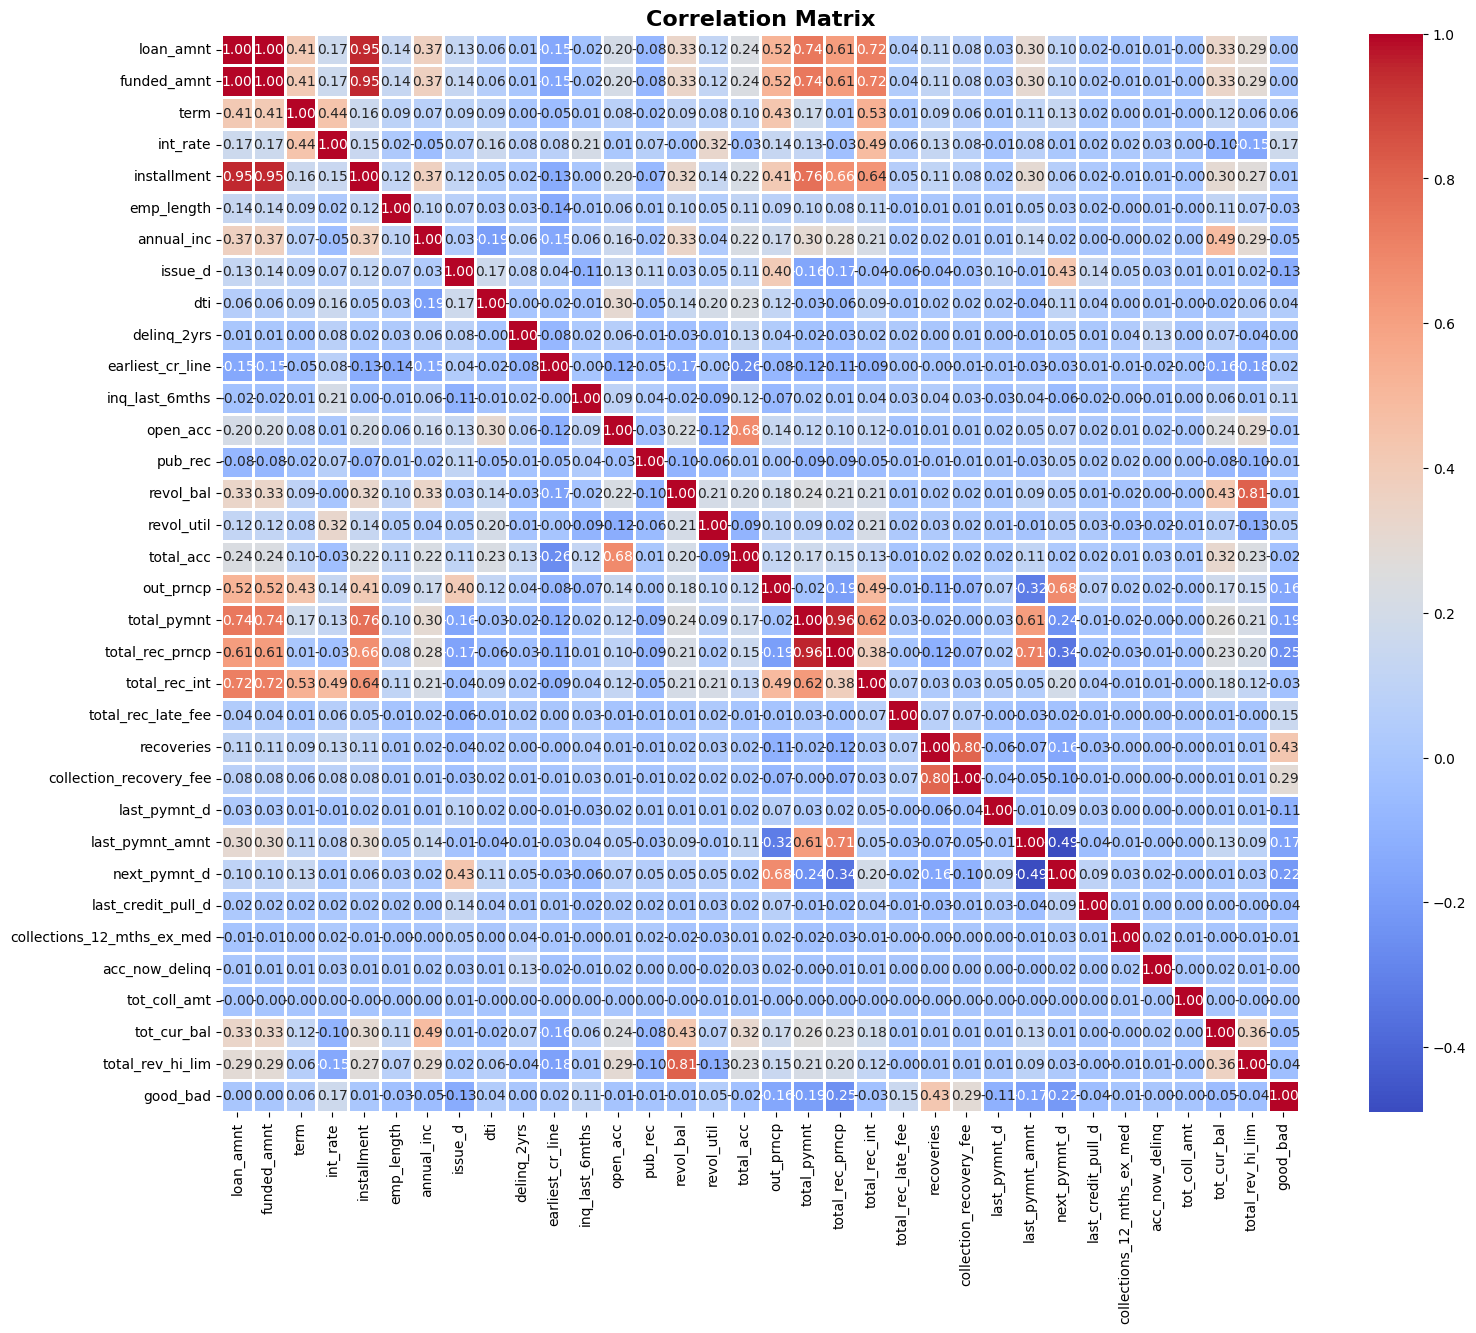

In [25]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
correlation_matrix = df[numerical_features].corr()

fig, ax = plt.subplots(figsize=(18, 14))
cmap = sns.color_palette('coolwarm', as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.75, square=True, ax=ax)

title = "Correlation Matrix"
plt.title(title, fontsize=16, fontweight='bold')
plt.show()

Beberapa kolom memiliki korelasi yang sangat tinggi dengan kolom lainnya seperti:
* “loan_amnt” dengan “funded_amnt” (korelasi 1.00). Kolerasi sempurna, menunjukkan bahwa kedua fitur ini menyampaikan informasi yang sangat serupa
* “Installment” dengan “Loan Amount” (korelasi 0.95), yang menunjukkan bahwa semakin besar jumlah pinjaman, maka semaking tinggi pula cicilan yang harus dibayarkan.

## Univariate Analysis

### Numerical Variable

In [26]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables : ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables :  34


,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
0,5000,5000,36,10.65,162.87,10,24000.0,2011-12-01,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,0.0,NaN,NaN,NaN,0
1,2500,2500,60,15.27,59.83,0,30000.0,2011-12-01,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,0.0,NaN,NaN,NaN,1
2,2400,2400,36,15.96,84.33,10,12252.0,2011-12-01,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,0.0,NaN,NaN,NaN,0
3,10000,10000,36,13.49,339.31,10,49200.0,2011-12-01,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,0.0,12226.302210,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,0.0,NaN,NaN,NaN,0
4,3000,3000,60,12.69,67.79,1,80000.0,2011-12-01,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,0.0,NaN,NaN,NaN,0


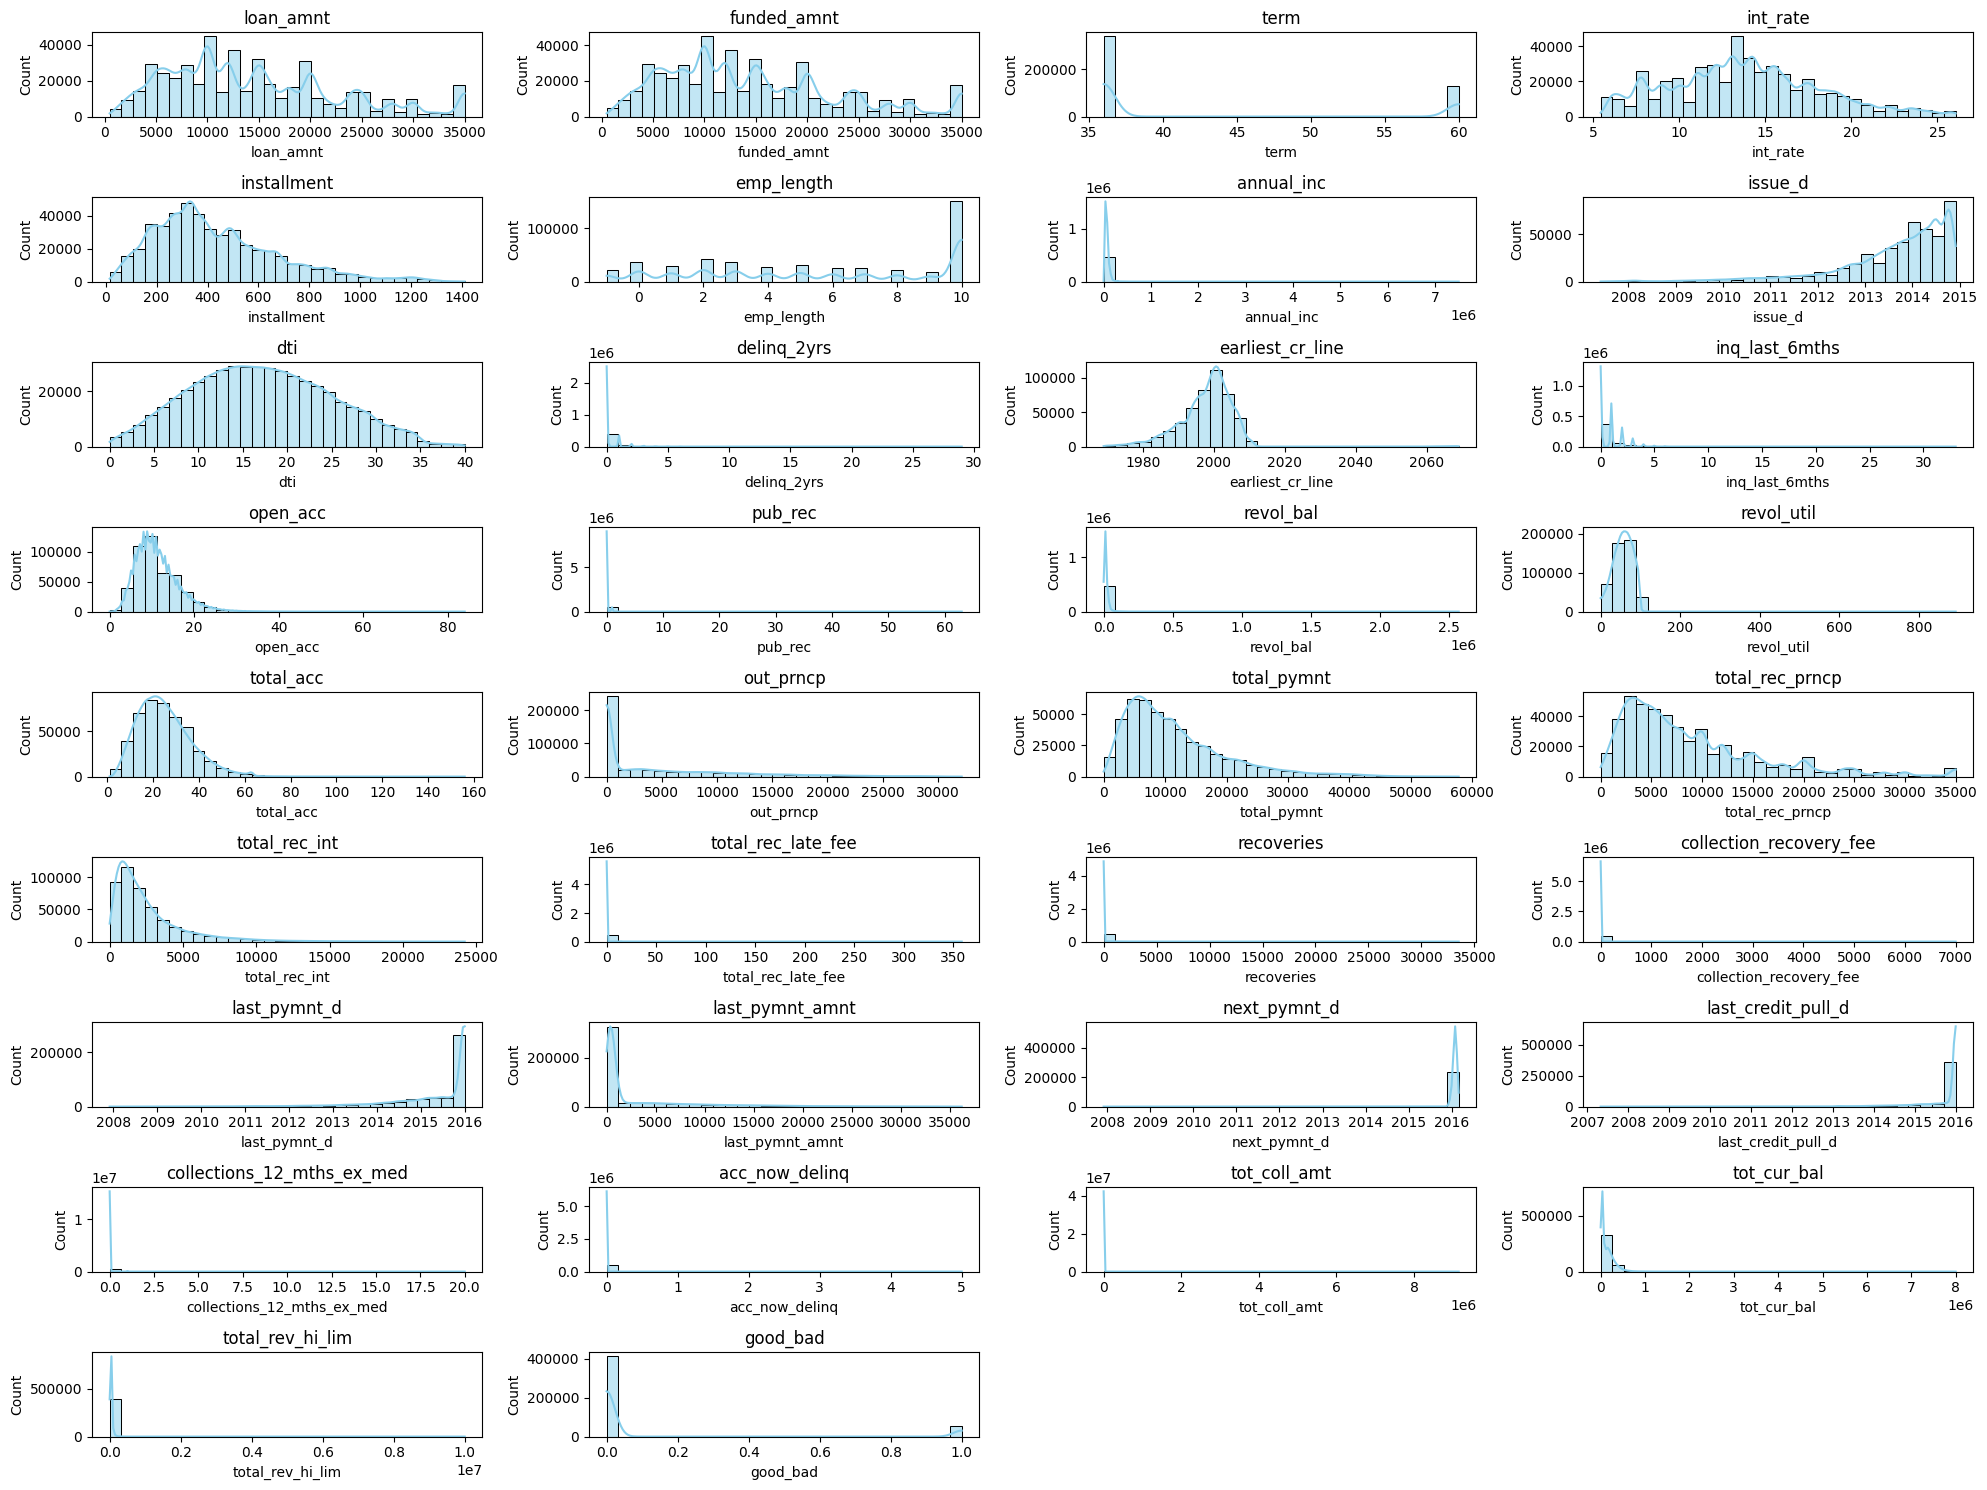

In [27]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
  plt.subplot(-(-len(numerical_features)// 4), 4, i)
  sns.histplot(df[feature], bins=30, kde=True, color ='skyblue')
  plt.title(feature)

plt.tight_layout()
plt.show()

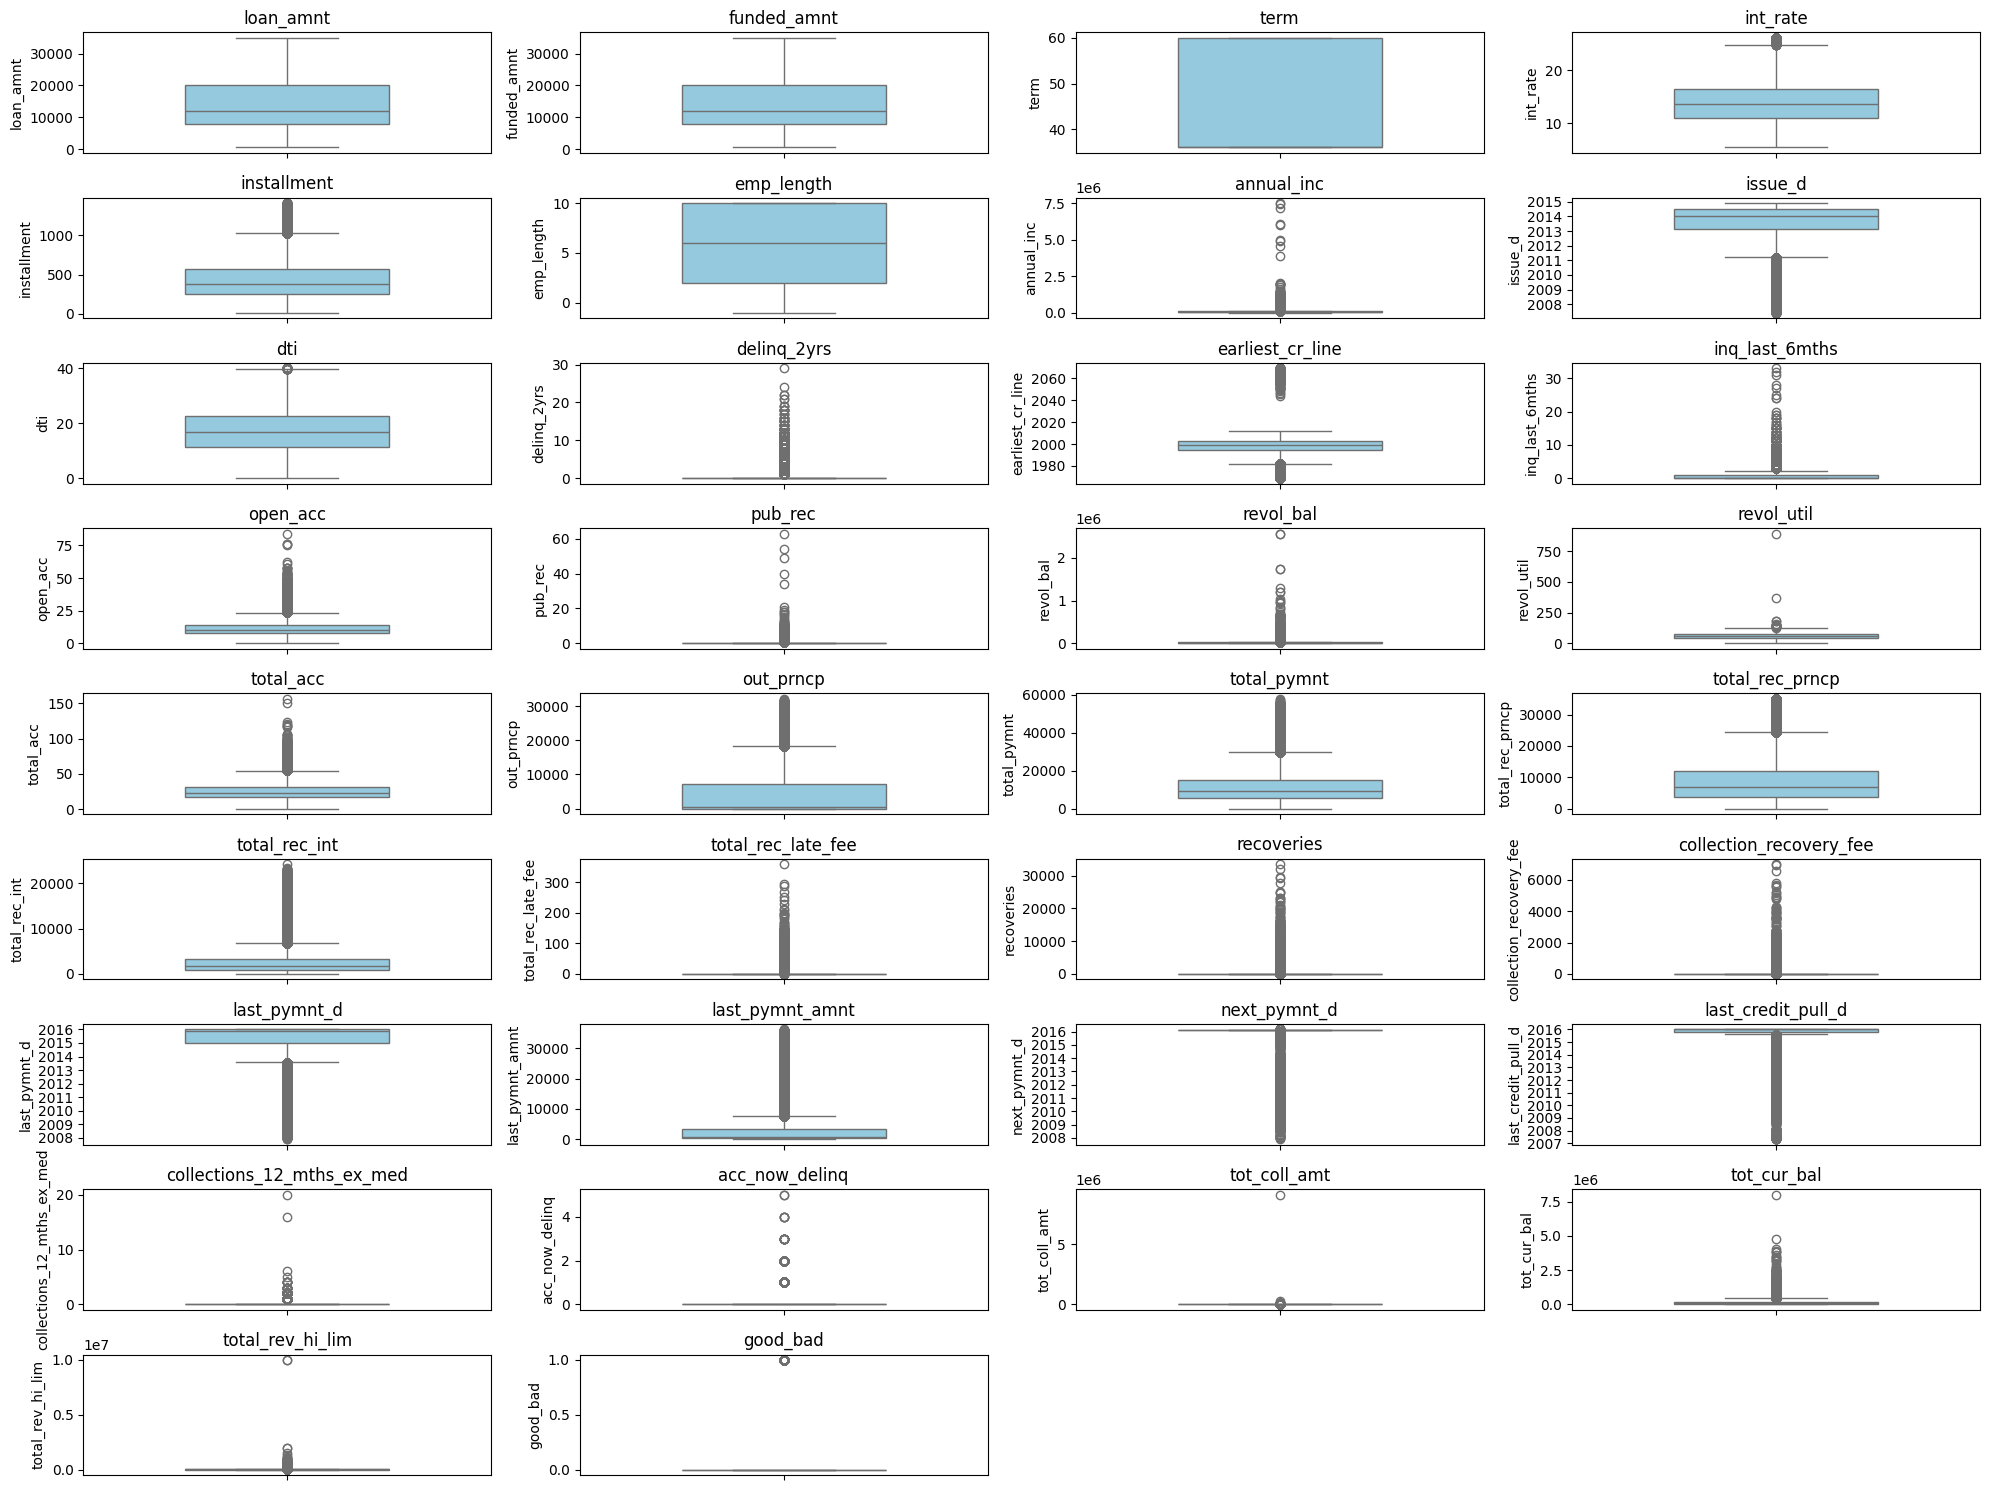

In [28]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
  plt.subplot(-(-len(numerical_features)// 4), 4, i)
  sns.boxplot(y = df[feature], color ='skyblue', width = 0.5)
  plt.title(feature)

plt.tight_layout()
plt.show()

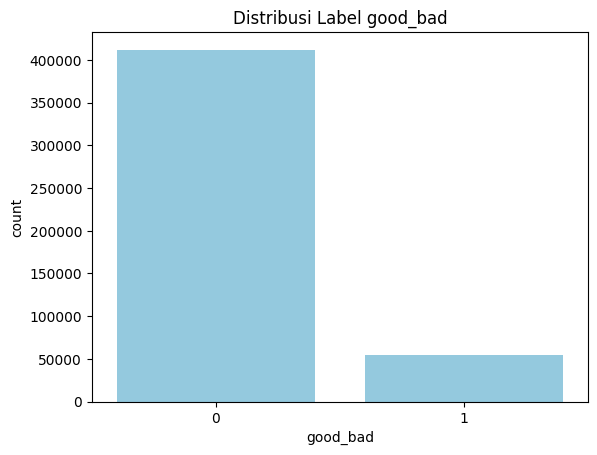

In [29]:
sns.countplot(x='good_bad', data=df, color = 'skyblue')
plt.xticks()
plt.title('Distribusi Label good_bad')
plt.show()

Visualisasi distribusi label good_bad menunjukkan adanya ketidakseimbangan kelas yang signifikan antara pinjaman baik (good) dan pinjaman bermasalah (bad). Jumlah label "good" jauh lebih dominan dibandingkan label "bad". Ketidakseimbangan ini dapat menimbulkan masalah dalam pembuatan model prediktif karena model cenderung bias terhadap kelas mayoritas (good) dan kurang mampu mengenali pola kelas minoritas (bad)

### Categorical Variabel

In [30]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]
print('Number of categorical variables : ', len(categorical_features))
df[categorical_features].head()

Number of categorical variables :  9


,grade,sub_grade,emp_title,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type
0,B,B2,NaN,RENT,Verified,n,credit_card,f,INDIVIDUAL
1,C,C4,Ryder,RENT,Source Verified,n,car,f,INDIVIDUAL
2,C,C5,NaN,RENT,Not Verified,n,small_business,f,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,n,other,f,INDIVIDUAL
4,B,B5,University Medical Group,RENT,Source Verified,n,other,f,INDIVIDUAL


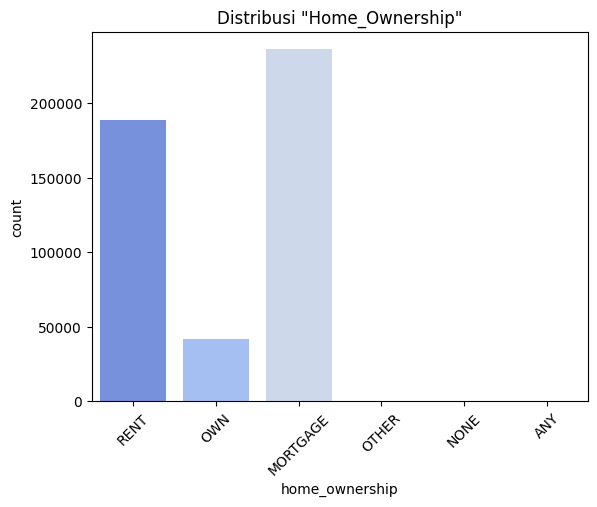

In [31]:
sns.countplot(x='home_ownership', data=df, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('Distribusi "Home_Ownership"')
plt.show()

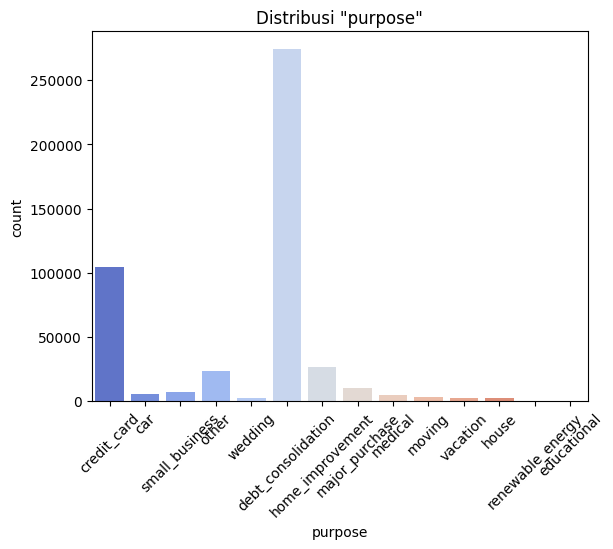

In [34]:
sns.countplot(x='purpose', data=df, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('Distribusi "purpose"')
plt.show()

## Bivariate Analysis

In [35]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'good_bad'],
      dtype='object')

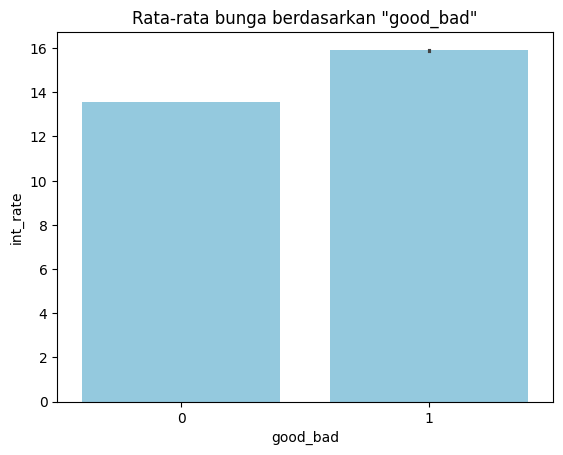

In [36]:
sns.barplot(x=df['good_bad'], y=df['int_rate'], color = 'skyblue')
plt.title('Rata-rata bunga berdasarkan "good_bad"')
plt.show()

Peminjam dengan kategori “bad” menghadapi suku bunga rata-rata yang lebih tinggi dibandingkan peminjam dengan kategori “good”.

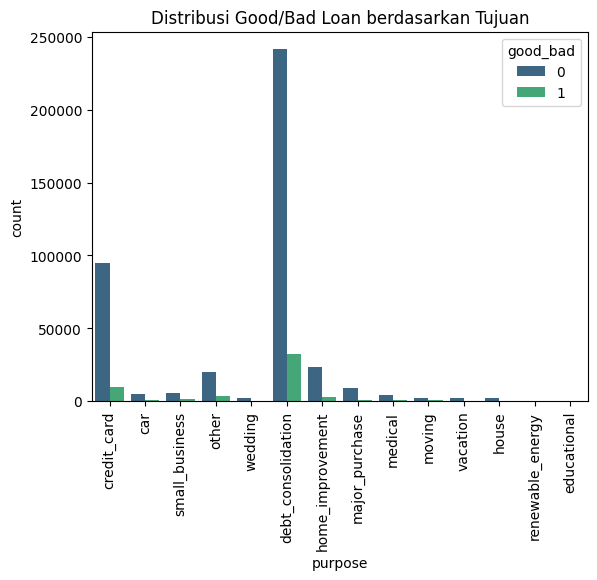

In [37]:
sns.countplot(x='purpose', hue='good_bad', data=df, palette= 'viridis')
plt.title('Distribusi Good/Bad Loan berdasarkan Tujuan')
plt.xticks(rotation = 90)
plt.show()

Debt Consolidation (pelunasan utang) memiliki jumlah pinjaman tertinggi (baik good maupun bad loan).

# Data Preparation

## Handling Missing Values

In [38]:
df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,27588
emp_length,0
home_ownership,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   466285 non-null  int64         
 1   funded_amnt                 466285 non-null  int64         
 2   term                        466285 non-null  int64         
 3   int_rate                    466285 non-null  float64       
 4   installment                 466285 non-null  float64       
 5   grade                       466285 non-null  object        
 6   sub_grade                   466285 non-null  object        
 7   emp_title                   438697 non-null  object        
 8   emp_length                  466285 non-null  int64         
 9   home_ownership              466285 non-null  object        
 10  annual_inc                  466281 non-null  float64       
 11  verification_status         466285 non-

In [40]:
# Menghapus missing values pada beberapa kolom
df = df.dropna(subset=[
    'emp_title', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line'
])

### Numerical Variables Missing Values

In [41]:
# Ambil semua kolom numerik saja (exclude datetime dan object)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Cari fitur numerik yang memiliki missing values
numerical_with_nan = [feature for feature in numerical_features if df[feature].isnull().sum() > 0]

# Print fitur dengan persentase missing values
for feature in numerical_with_nan:
    print(f"{feature} : {np.round(df[feature].isnull().mean() * 100, 2)}% Missing values")

revol_util : 0.05% Missing values
collections_12_mths_ex_med : 0.02% Missing values
tot_coll_amt : 2.75% Missing values
tot_cur_bal : 2.75% Missing values
total_rev_hi_lim : 2.75% Missing values


In [42]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value= df[feature].median()

    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)


df[numerical_with_nan].isnull().sum()

,0
revol_util,0
collections_12_mths_ex_med,0
tot_coll_amt,0
tot_cur_bal,0
total_rev_hi_lim,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224141 entries, 4 to 466282
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   loan_amnt                      224141 non-null  int64         
 1   funded_amnt                    224141 non-null  int64         
 2   term                           224141 non-null  int64         
 3   int_rate                       224141 non-null  float64       
 4   installment                    224141 non-null  float64       
 5   grade                          224141 non-null  object        
 6   sub_grade                      224141 non-null  object        
 7   emp_title                      224141 non-null  object        
 8   emp_length                     224141 non-null  int64         
 9   home_ownership                 224141 non-null  object        
 10  annual_inc                     224141 non-null  float64       
 11  verif

## Handling Outliers

In [44]:
outliers_columns = ['int_rate','installment', 'annual_inc', 'delinq_2yrs','inq_last_6mths',
                   'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                   'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                   'recoveries','collection_recovery_fee','last_pymnt_amnt',
                   'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
                   'total_rev_hi_lim']
def cap_outliers(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound,
                                  np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col]))
    return df_capped

# Terapkan capping dan simpan hasil ke variabel baru
df_capped = cap_outliers(df, outliers_columns )


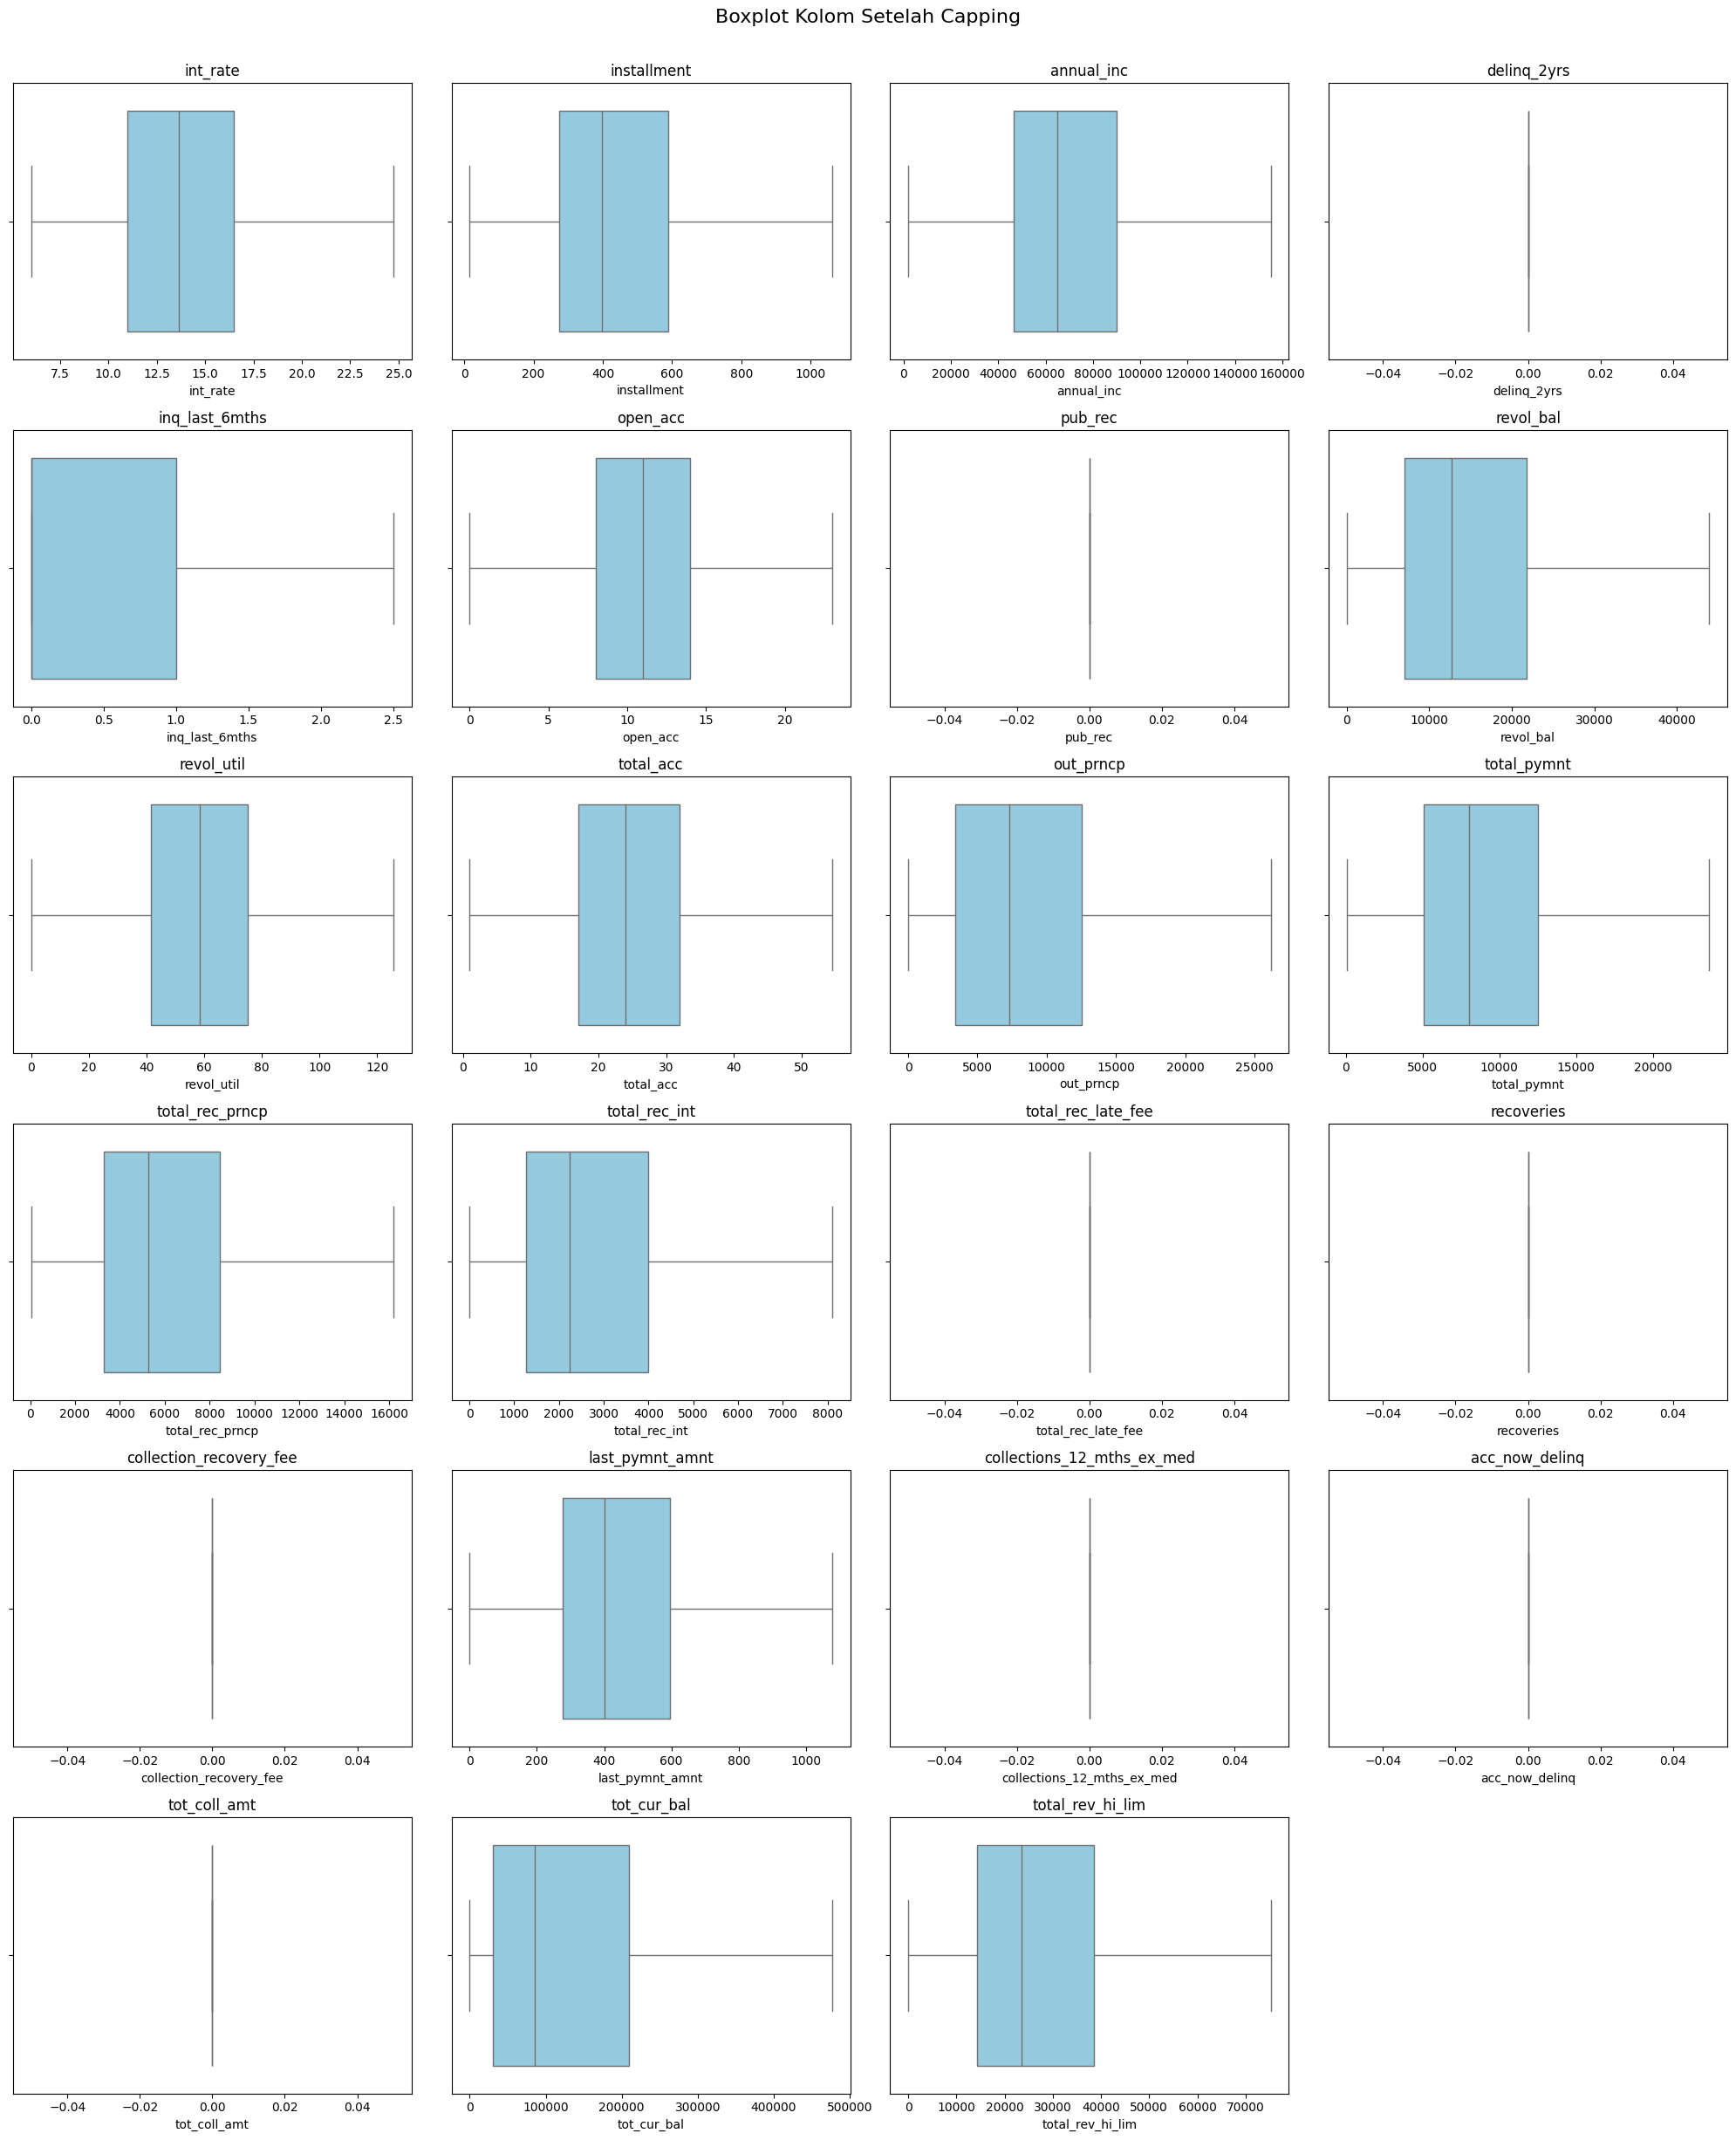

In [46]:
# Atur jumlah kolom per baris
n_cols = 4
n_rows = -(-len(outliers_columns ) // n_cols)  # pembulatan ke atas

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop untuk buat subplot boxplot tiap kolom
for i, col in enumerate(outliers_columns , 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_capped[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplot Kolom Setelah Capping", y=1.02, fontsize=16)
plt.show()


In [47]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224141 entries, 4 to 466282
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   loan_amnt                      224141 non-null  int64         
 1   funded_amnt                    224141 non-null  int64         
 2   term                           224141 non-null  int64         
 3   int_rate                       224141 non-null  float64       
 4   installment                    224141 non-null  float64       
 5   grade                          224141 non-null  object        
 6   sub_grade                      224141 non-null  object        
 7   emp_title                      224141 non-null  object        
 8   emp_length                     224141 non-null  int64         
 9   home_ownership                 224141 non-null  object        
 10  annual_inc                     224141 non-null  float64       
 11  verif

## Feature Encoding

In [48]:
df_capped.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

### Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

# Kolom yang akan di-Label Encoding (ordinal)
label_columns = ['grade', 'sub_grade']

# Buat salinan dari LabelEncoder
le = LabelEncoder()

# Label Encoding untuk kolom-kolom di label_columns
for col in label_columns:
    df_capped[col] = le.fit_transform(df_capped[col])


### One-hot Encoding

In [50]:
# Kolom yang akan di-One-Hot Encoding (nominal)
onehot_columns = ['home_ownership', 'verification_status', 'pymnt_plan',
                  'purpose', 'initial_list_status', 'application_type']

df_capped = df_capped.drop('emp_title', axis=1)
# One-Hot Encoding untuk kolom-kolom nominal
df_capped = pd.get_dummies(df_capped, columns=onehot_columns, drop_first=True)


In [51]:
df_capped.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad,revol_utilnan,collections_12_mths_ex_mednan,tot_coll_amtnan,tot_cur_balnan,total_rev_hi_limnan,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
4,3000,3000,60,12.69,67.79,1,9,1,80000.0,2011-12-01,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783.0,53.9,38.0,766.90,3242.17,2233.10,1009.07,0.0,0.0,0.0,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,0.0,0.0,85875.0,23600.0,0,0,0,1,1,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,7000,7000,60,15.96,170.08,2,14,8,47004.0,2011-12-01,23.51,0.0,2005-07-01,1.0,7.0,0.0,17726.0,85.6,11.0,1889.15,8136.84,5110.85,3025.99,0.0,0.0,0.0,2016-01-01,170.08,2016-02-01,2016-01-01,0.0,0.0,0.0,85875.0,23600.0,0,0,0,1,1,1,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
32,10000,10000,60,15.96,242.97,2,14,2,29120.0,2011-12-01,22.83,0.0,1997-02-01,1.0,11.0,0.0,16158.0,63.6,31.0,2695.31,11622.36,7304.67,4317.69,0.0,0.0,0.0,2016-01-01,242.97,2016-01-01,2016-01-01,0.0,0.0,0.0,85875.0,23600.0,0,0,0,1,1,1,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
39,12500,12500,60,12.69,282.44,1,9,1,27000.0,2011-12-01,16.04,0.0,2001-12-01,2.5,6.0,0.0,10143.0,50.0,24.0,3193.13,13506.54,9306.87,4199.67,0.0,0.0,0.0,2016-01-01,282.44,2016-01-01,2016-01-01,0.0,0.0,0.0,85875.0,23600.0,0,0,0,1,1,1,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
86,14000,14000,60,17.27,349.98,3,17,4,28000.0,2011-12-01,6.34,0.0,2005-07-01,2.0,5.0,0.0,6986.0,79.4,10.0,3842.41,16777.04,10157.60,6619.44,0.0,0.0,0.0,2016-01-01,349.98,2016-01-01,2016-01-01,0.0,0.0,0.0,85875.0,23600.0,0,0,0,1,1,1,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


## Feature Scalling

In [52]:
df_capped.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'annual_inc', 'issue_d', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'good_bad', 'revol_utilnan',
       'collections_12_mths_ex_mednan', 'tot_coll_amtnan', 'tot_cur_balnan',
       'total_rev_hi_limnan', 'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'pymnt_plan_y', 'purpose_credit_card', 'purpose_debt_consolidation',
  

In [53]:
# drop datetime columns
df_capped = df_capped.drop(columns=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'])

In [54]:
# Memisahkan fitur dan target
X = df_capped.drop(columns=['good_bad'])  # asumsi 'good_bad' adalah target
y = df_capped['good_bad']

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)

# Simpan dalam DataFrame lagi dengan nama kolom yang sama
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

In [56]:
X_scaled

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,revol_utilnan,collections_12_mths_ex_mednan,tot_coll_amtnan,tot_cur_balnan,total_rev_hi_limnan,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,-1.457531,-1.457317,1.39026,-0.272297,-1.618489,-0.658145,-0.354270,-1.419620,0.230110,-0.007894,0.0,-0.789727,0.744331,0.0,1.050778,-0.162279,1.140236,-1.225197,-1.084964,-1.030277,-0.878674,0.0,0.0,0.0,-1.600258,0.0,0.0,0.0,-0.382646,-0.266610,-0.022853,-0.015808,5.949651,5.949651,5.949651,-0.003658,-0.013192,-0.314377,1.251169,1.300991,-0.690111,-0.005588,-0.568487,-1.218861,-0.020153,-0.239934,-0.058674,-0.132287,-0.091872,-0.070611,4.635792,-0.020483,-0.099218,-0.067279,-0.041046,-0.897995
1,-0.982740,-0.982340,1.39026,0.485654,-1.182404,0.103235,0.415279,0.504788,-0.739459,0.696921,0.0,0.403494,-0.946147,0.0,0.170515,1.236855,-1.277073,-1.051809,-0.224733,-0.308061,0.045816,0.0,0.0,0.0,-1.175805,0.0,0.0,0.0,-0.382646,-0.266610,-0.022853,-0.015808,5.949651,5.949651,5.949651,-0.003658,-0.013192,-0.314377,1.251169,-0.768645,-0.690111,-0.005588,-0.568487,0.820438,-0.020153,-0.239934,-0.058674,-0.132287,-0.091872,-0.070611,-0.215713,-0.020483,-0.099218,-0.067279,-0.041046,-0.897995
2,-0.626646,-0.626108,1.39026,0.485654,-0.871657,0.103235,0.415279,-1.144705,-1.264970,0.610875,0.0,0.403494,-0.100908,0.0,0.033272,0.265847,0.513526,-0.927257,0.387843,0.242512,0.637889,0.0,0.0,0.0,-0.873348,0.0,0.0,0.0,-0.382646,-0.266610,-0.022853,-0.015808,5.949651,5.949651,5.949651,-0.003658,-0.013192,-0.314377,1.251169,-0.768645,1.449042,-0.005588,-0.568487,0.820438,-0.020153,-0.239934,-0.058674,-0.132287,-0.091872,-0.070611,-0.215713,-0.020483,-0.099218,-0.067279,-0.041046,-0.897995
3,-0.329902,-0.329248,1.39026,-0.272297,-0.703388,-0.658145,-0.354270,-1.419620,-1.327265,-0.248316,0.0,2.193327,-1.157456,0.0,-0.493205,-0.334412,-0.113183,-0.850344,0.718985,0.744996,0.583793,0.0,0.0,0.0,-0.709568,0.0,0.0,0.0,-0.382646,-0.266610,-0.022853,-0.015808,5.949651,5.949651,5.949651,-0.003658,-0.013192,-0.314377,1.251169,-0.768645,1.449042,-0.005588,-0.568487,0.820438,-0.020153,-0.239934,-0.058674,-0.132287,-0.091872,-0.070611,-0.215713,-0.020483,-0.099218,-0.067279,-0.041046,-0.897995
4,-0.151855,-0.151132,1.39026,0.789298,-0.415450,0.864615,0.877008,-0.594874,-1.297880,-1.475731,0.0,1.596716,-1.368766,0.0,-0.769529,0.963208,-1.366603,-0.750030,1.293771,0.958499,1.692936,0.0,0.0,0.0,-0.429310,0.0,0.0,0.0,-0.382646,-0.266610,-0.022853,-0.015808,5.949651,5.949651,5.949651,-0.003658,-0.013192,-0.314377,1.251169,-0.768645,1.449042,-0.005588,-0.568487,-1.218861,-0.020153,-0.239934,-0.058674,-0.132287,-0.091872,-0.070611,4.635792,-0.020483,-0.099218,-0.067279,-0.041046,-0.897995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224136,-0.389250,-0.388620,1.39026,1.765131,-0.509624,1.625995,1.492647,1.054619,0.523954,-0.374853,0.0,1.596716,0.321712,0.0,0.868371,1.740014,1.498356,-0.007815,-0.271742,-0.749065,0.728669,0.0,0.0,0.0,-0.520973,0.0,0.0,0.0,1.236721,-0.116132,-0.022853,-0.015808,-0.168077,-0.168077,-0.168077,-0.003658,-0.013192,-0.314377,-0.799253,-0.768645,1.449042,-0.005588,1.759055,-1

In [57]:
X_scaled.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,revol_utilnan,collections_12_mths_ex_mednan,tot_coll_amtnan,tot_cur_balnan,total_rev_hi_limnan,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
count,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,224141.0,2.241410e+05,2.241410e+05,224141.0,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,224141.0,224141.0,224141.0,2.241410e+05,224141.0,224141.0,224141.0,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05,2.241410e+05
mean,7.253121e-17,1.069582e-16,1.493737e-16,-7.821198e-16,-1.926135e-16,-3.842125e-17,8.077339e-17,-1.315896e-16,-1.268028e-19,4.086221e-17,0.0,-3.309553e-17,-9.763817e-17,0.0,-4.165472e-17,-9.104442e-17,5.680766e-17,1.085432e-16,-1.085432e-16,4.235214e-16,1.009350e-16,0.0,0.0,0.0,-3.428748e-16,0.0,0.0,0.0,-1.083530e-16,-7.417965e-17,6.070685e-18,3.106669e-18,1.415119e-16,1.415119e-16,1.415119e-16,2.393403e-18,2.219049e-18,-7.446495e-17,-1.978124e-17,-1.394831e-18,-1.141225e-16,-4.168642e-18,-5.579324e-18,1.101599e-16,-4.025989e-18,4.209853e-17,1.902042e-18,3.081308e-17,1.917893e-18,1.077824e-17,-5.287677e-17,-1.432872e-17,-3.674112e-17,1.860831e-17,-1.134885e-17,-5.477882e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,1.000002e+00,1.000002e+00,0.0,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,0.0,0.0,1.000002e+00,0.0,0.0,0.0,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.754276e+00,-1.754177e+00,-7.192899e-01,-1.822968e+00,-1.840689e+00,-1.419525e+00,-1.739459e+00,-1.969451e+00,-2.064931e+00,-2.277980e+00,0.0,-7.897273e-01,-2.425315e+00,0.0,-1.380996e+00,-2.541250e+00,-2.172372e+00,-1.343683e+00,-1.644722e+00,-1.579806e+00,-1.339576e+00,0.0,0.0,0.0,-1.881552e+00,0.0,0.0,0.0,-1.049318e+00,-1.491184e+00,-2.285313e-02,-1.580839e-02,-1.680771e-01,-1.680771e-01,-1.680771e-01,-3.658498e-03,-1.319196e-02,-3.143767e-01,-7.992528e-01,-7.686446e-01,-6.901110e-01,-5.588499e-03,-5.684872e-01,-1.218861e+00,-2.015340e-02,-2.399337e-01,-5.867442e-02,-1.322875e-01,-9.187151e-02,-7.061090e-02,-2.157129e-01,-2.048304e-02,-9.921841e-02,-6.727919e-02,-4.104645e-02,-8.979945e-01
25%,-7.453439e-01,-7.448522e-01,-7.192899e-01,-6.663393e-01,-7.397106e-01,-6.581454e-01,-8.159998e-01,-8.697894e-01,-7.517707e-01,-7.506703e-01,0.0,-7.897273e-01,-7.348369e-01,0.0,-7.678663e-01,-7.139884e-01,-7.398930e-01,-8.160866e-01,-7.625044e-01,-7.638369e-01,-7.637015e-01,0.0,0.0,0.0,-7.381992e-01,0.0,0.0,0.0,-8.087025e-01,-7.543637e-0

## Feature selection

In [58]:
# Fitur dan target sudah dipisah
X = X_scaled
y = df_capped['good_bad']

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [60]:
# Inisialisasi Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Inisialisasi RFE dengan model dan pilih 10 fitur terpenting
rfe = RFE(model, n_features_to_select=10)

# Fitting RFE ke data
X_selected = rfe.fit_transform(X, y)

# Fitur yang terpilih
selected_features = X.columns[rfe.support_]
print("Fitur yang terpilih:", selected_features)

Fitur yang terpilih: Index(['loan_amnt', 'int_rate', 'installment', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
       'tot_coll_amtnan', 'total_rev_hi_limnan'],
      dtype='object')


## Data Splitting

In [61]:
from sklearn.model_selection import train_test_split

# Split data: 80% data latih, 20% data uji, stratify agar proporsi kelas tetap
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)
print(f'Training set dimension: {X_train.shape}')
print(f'Testing set dimension: {X_test.shape}')

Training set dimension: (179312, 10)
Testing set dimension: (44829, 10)


In [62]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE hanya pada data latih
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah resampling
from collections import Counter
print("Distribusi setelah SMOTE:", Counter(y_train_resampled))


Distribusi setelah SMOTE: Counter({0: 170595, 1: 170595})


In [63]:
# Sebelum
print("Sebelum SMOTE:\n", y_train.value_counts(normalize=True))

# Sesudah
import pandas as pd
print("Sesudah SMOTE:\n", pd.Series(y_train_resampled).value_counts(normalize=True))


Sebelum SMOTE:
 good_bad
0    0.951386
1    0.048614
Name: proportion, dtype: float64
Sesudah SMOTE:
 good_bad
0    0.5
1    0.5
Name: proportion, dtype: float64


# Data Modelling

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Inisialisasi dan fit model pada data training yang sudah diresample
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data uji
y_pred_logreg = logreg.predict(X_test)

# Evaluasi model
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))



Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     42650
           1       0.12      0.60      0.20      2179

    accuracy                           0.77     44829
   macro avg       0.55      0.69      0.53     44829
weighted avg       0.93      0.77      0.83     44829

ROC AUC Score: 0.7570062684034482


## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     42650
           1       0.39      0.48      0.43      2179

    accuracy                           0.94     44829
   macro avg       0.68      0.72      0.70     44829
weighted avg       0.94      0.94      0.94     44829



## XGBoost

In [68]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95     42650
           1       0.29      0.52      0.37      2179

    accuracy                           0.91     44829
   macro avg       0.63      0.73      0.66     44829
weighted avg       0.94      0.91      0.93     44829



# Model Evaluation

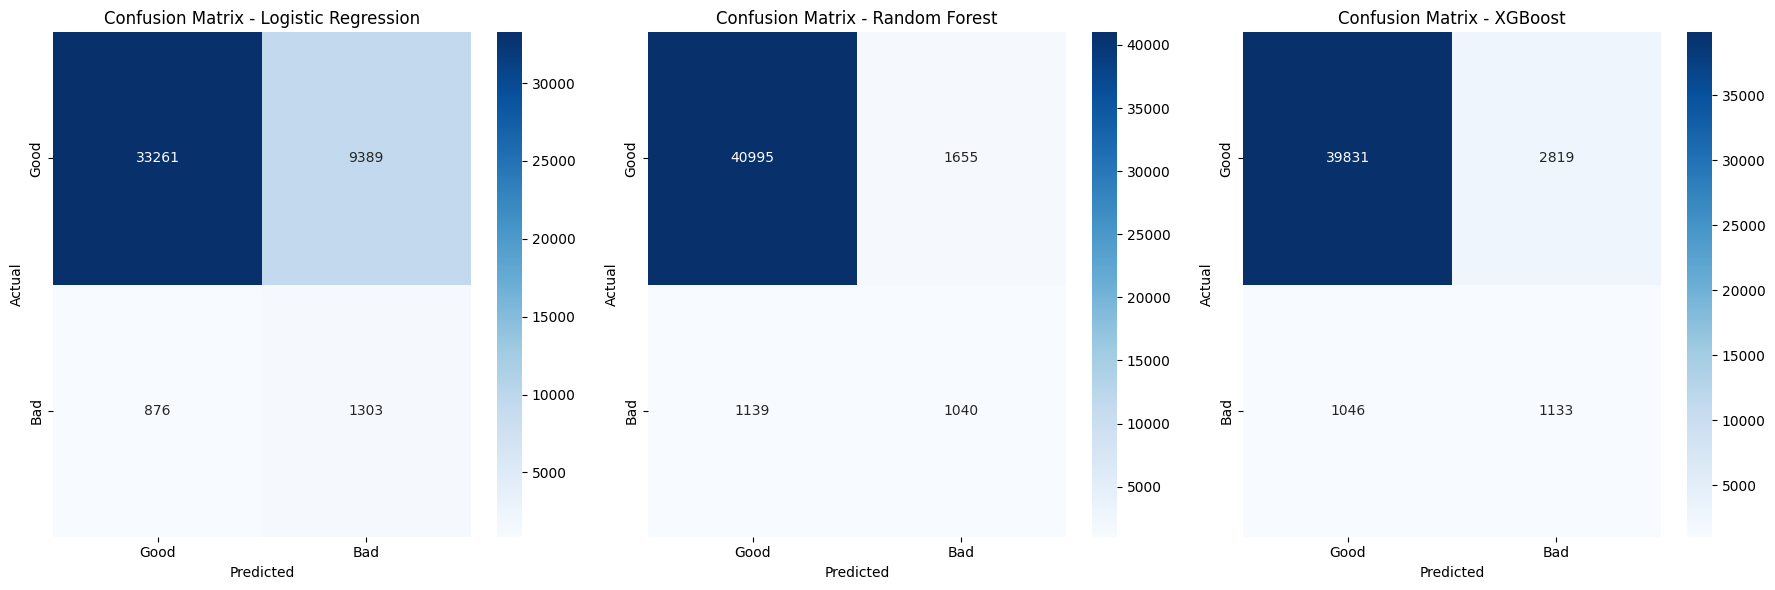

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prediksi untuk masing-masing model
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Confusion Matrix untuk masing-masing model
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Membuat fungsi untuk plot confusion matrix
def plot_confusion_matrix(ax, cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'], ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Menyiapkan subplots untuk 3 confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualisasi Confusion Matrix untuk masing-masing model di subplots
plot_confusion_matrix(axes[0], cm_logreg, 'Logistic Regression')
plot_confusion_matrix(axes[1], cm_rf, 'Random Forest')
plot_confusion_matrix(axes[2], cm_xgb, 'XGBoost')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()


In [70]:
from sklearn.metrics import accuracy_score

# Akurasi untuk masing-masing model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Accuracy - Logistic Regression:", accuracy_logreg)
print("Accuracy - Random Forest:", accuracy_rf)
print("Accuracy - XGBoost:", accuracy_xgb)


Accuracy - Logistic Regression: 0.7710187601775637
Accuracy - Random Forest: 0.9376742733498405
Accuracy - XGBoost: 0.9137834883669054


# Summary

Berdasarkan hasil evaluasi terhadap tiga model klasifikasi (Logistic Regression, Random Forest, dan XGBosst), Random Forest menjadi model dengan performa terbaik untuk prediksi risiko kredit. Model ini mencapai akurasi tertinggi sebesar 94% jauh melampaui Logistic Regression (77%) dan XGBoost (91%). Keunggulan Random Forest terlihat dalam menangani kelas minoritas, di mana ia berhasil mencapai keseimbangan antara precision (39%) dan recall (48%) dengan F1-score tertinggi (0.43).